# Polynomial Interpolation – Error Analysis

TMA4125 Vår 2022

This notebook accompanies the slides [02-Polynomial-interpolation-error-analysis.pdf](https://www.math.ntnu.no/emner/TMA4125/2022v/lecture-notes/02-Polynomial-interpolation-error-analysis.pdf).

We first can include/run the methods notebook such that its methods are defined here as well.

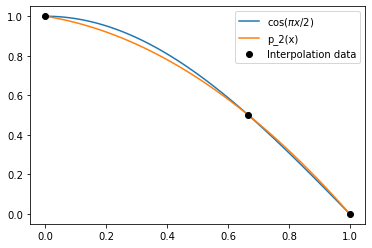

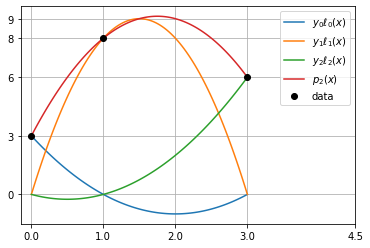

[[ 1.   -0.75 -0.75]
 [ 0.5  -1.5   0.  ]
 [ 0.    0.    0.  ]]


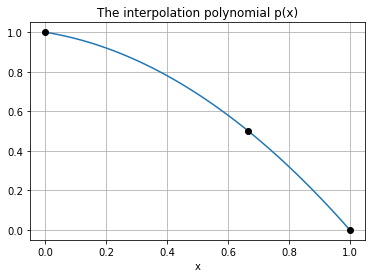

In [101]:
%run 02-Polynomial-interpolation-methods.ipynb

## Example 

Compare slide #3

* $f(x)=\sin(x)$, $x\in [0,2\pi]$
* equidistant nodes $x_i=ih$, $i=0,\dots,n$, and $h=2\pi/n$

We compute the error of interpolation and its maximum

In [116]:
# Define the function
def f(x):
    return np.sin(x)

In [103]:
# Set the interval 
a, b = 0, 2*pi                     # The interpolation interval
x = np.linspace(a, b, 101)         # The 'x-axis' 

# Set the interpolation points
n = 8                              # Interpolation points
xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)                

    # Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

Max error is 1.20e-03


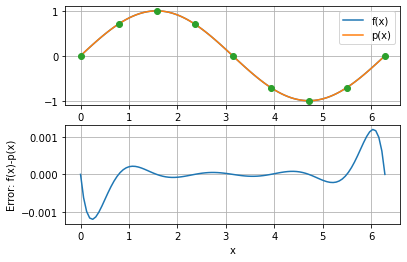

In [105]:
# Plot f(x) og p(x) and the interpolation points
plt.subplot(2,1,1)                  
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)
# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

## Example 2

Slide #4

Your turn: Let‘s try the Runge function

In [106]:
def f(x):
    return 1/(1+x**2)

We can reuse the code from above. Copy it here and adapt it.

In [107]:
# Set the interval 
a, b = -5, 5                       # The interpolation interval
x = np.linspace(a, b, 101)         # The 'x-axis' 

# Set the interpolation points
n = 16                              # Interpolation points
xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)                

    # Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

Max error is 1.41e+01


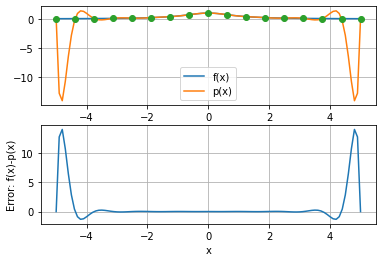

In [108]:
# Plot f(x) og p(x) and the interpolation points
plt.subplot(2,1,1)                  
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)
# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

## On the choice of nodes

The bound from slide #9 can be computed using

In [109]:
def equidistant_bound(n, M, a, b):
    """
    equidistributed_bound(n, M, a, b)
    
    return the value of the interpolation error upper bound for
    equidistant points $x_0,\ldots,x_n$ on $[a,b]$, given that we
    have the upper bound for the $n+1$ derivative of $f$ in `M`.
    """
    h = (b-a)/n
    return 0.25*h**(n+1)/(n+1)*M;

Let‘s look at the $\lvert \omega(x) \rvert = \prod_{i=0}^{n}\lvert x-x_i \rvert$ for equidistant points $x_i$.

We first define $\omega$ for arbitrary points

In [110]:
def omega(xdata, x):
    """
    omega(xdata,x)
    
    evaluate the function $omega(x) = prod_{i=0}^n (x-x_i)$
    at all values from `x`.
    Input: `xdata` a vector containing the $x_i$ above,
    `x` the values to evaluate $\omega$ at.
    """
    n1 = len(xdata)
    omega_value = np.ones(len(x))             
    for j in range(n1):
        omega_value = omega_value*(x-xdata[j])  # (x-x_0)(x-x_1)...(x-x_n)
    return omega_value

n = 16, max|omega(x)| = 2.05e+08


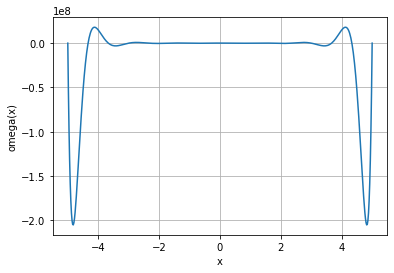

In [111]:
# Plot omega(x) 
n = 16                            # Number of interpolation points is n+1
a, b = -5, 5                     # The interval
x = np.linspace(a, b, 501)        
xdata = np.linspace(a, b, n) 
y = omega(xdata, x)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(y))))

The following function can be used to compute the Chebyshev nodes on arbitrary intervals $[a,b]$.

In [142]:
def chebyshev_nodes(a, b, n):
    """
    chebyshev_nodes(a, b, n)
    
    return $n+1$ Chebyshev nodes $x_0,\ldots,x_n$ on $[a,b]$
    """
    i = np.array(range(n))              # i = [0,1,2,3, ....n-1]
    x = np.cos((2*i+1)*pi/(2*(n)))      # nodes over the interval [-1,1]
    return 0.5*(b-a)*x+0.5*(b+a)        # nodes over the interval [a,b]

In [1]:
# Define the function
def f(x):
    return np.sin(x)


# Plot omega_chebyshev(x) 
n = 32                            # Number of interpolation points is n+1
a, b = -5, 5                     # The interval
x = np.linspace(a, b, 501)        
xdata = chebyshev_nodes(a, b, n+1)

    # Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

plt.plot(xdata, p)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(y))))

NameError: name 'np' is not defined

n = 32, max|omega(x)| = 1.08e+13


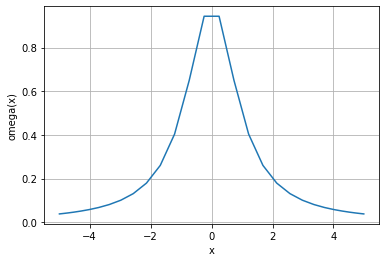

In [150]:
# Define the function
def f(x):
    return 1/(1+x**2)

# Plot omega_chebyshev(x) 
n = 32                            # Number of interpolation points is n+1
a, b = -5, 5                     # The interval
x = np.linspace(a, b, 501)        
xdata = chebyshev_nodes(a, b, n)
plt.plot(xdata, f(xdata))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('omega(x)')
print("n = {:2d}, max|omega(x)| = {:.2e}".format(n, max(abs(y))))

Max error is 1.38e-03


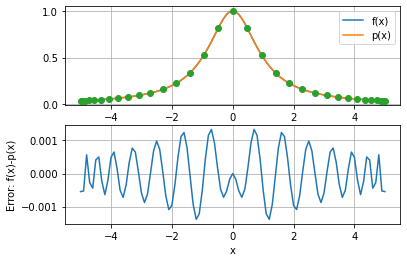

In [146]:
# Set the interval 
a, b = -5, 5                       # The interpolation interval
x = np.linspace(a, b, 101)         # The 'x-axis' 

# Set the interpolation points
n = 32                              # Interpolation points
xdata = chebyshev_nodes(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)                

    # Evaluate the interpolation polynomial in the x-values
l = cardinal(xdata, x)  
p = lagrange(ydata, l)

# Plot f(x) og p(x) and the interpolation points
plt.subplot(2,1,1)                  
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)
# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))